## Assignment MultiLinear Regression

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Importing the CSV dataset for analyisis with specified columns

In [2]:
toyota = pd.read_csv('ToyotaCorolla1.csv',usecols=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"])
toyota.shape

(1436, 9)

In [3]:
toyota.head() #checking the data - first look

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


***Renaming few columns for uniformity and ease of typing / true representation*** -----below

In [4]:
toyota.rename({'Age_08_04':'AgeMonth','Quarterly_Tax':'QurtTax','cc':'CC'},axis=1,inplace=True)
toyota.head(5)

,Price,AgeMonth,KM,HP,CC,Doors,Gears,QurtTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
toyota.info() # Checking the Data type and other details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Price     1436 non-null   int64
 1   AgeMonth  1436 non-null   int64
 2   KM        1436 non-null   int64
 3   HP        1436 non-null   int64
 4   CC        1436 non-null   int64
 5   Doors     1436 non-null   int64
 6   Gears     1436 non-null   int64
 7   QurtTax   1436 non-null   int64
 8   Weight    1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


All columns are marked 'int64' as their datatype. None of the features contain null values. There are total of 1436 records and 9 features in the dataset.

In [6]:
toyota.describe() # Checking the key statistics for each feature

,Price,AgeMonth,KM,HP,CC,Doors,Gears,QurtTax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


***Looking at above describe table we can see that 'Price','KM', 'QuartTax','Weight' have mean higher than median, which means the right skewness & 'AgeMonth', 'HP', 'CC', have mean lower than median showing left skewness, where as 'Doors','Gears' have equal mean and meadian indicating normal distribution.*** **<u>Let us use Boxplot to see if we have outliers</u>**  

***Importing numpy to check no of unique values in a data set, This will help us find the range of values and repetion of values in a data set. if there are very few unique values in comparision to price then we can decide to drop the column under low varience filter step, as it does not explain the variation in the price***

In [13]:
# Checking the unique values for each variable
import numpy as np
print(f'\n\033[1m\033[7m Price \033[0m\n\033[1mNo of unique values {len(np.unique(toyota.Price))},\n10-Unique vals\n', np.unique(toyota.Price)[:10])
print(f'\n\033[1m\033[7m AgeMonth \033[0m\n\033[1mNo of unique values {len(np.unique(toyota.AgeMonth))},\nUnique vals\n', np.unique(toyota.AgeMonth))
print(f'\n\033[1m\033[7m KM \033[0m\n\033[1mNo of unique values {len(np.unique(toyota.KM))},\n10-Unique vals\n', np.unique(toyota.KM)[:10])


 Price 
No of unique values 236,
10-Unique vals
 [4350 4400 4450 4750 5150 5250 5600 5740 5750 5751]

 AgeMonth 
No of unique values 77,
Unique vals
 [ 1  2  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80]

 KM 
No of unique values 1263,
10-Unique vals
 [   1   15  225  450 1500 2000 3000 4000 5000 5278]


In [16]:
print(f'\n\033[1m\033[7m HP \033[0m\n\033[1mNo of unique values {len(np.unique(toyota.HP))},\nUnique vals\n', np.unique(toyota.HP)[:10])
print(f'\n\033[1m\033[7m CC \033[0m\n\033[1mNo of unique values {len(np.unique(toyota.CC))},\nUnique vals\n', np.unique(toyota.CC))
print(f'\n\033[1m\033[7m Doors \033[0m\n\033[1mNo of unique values {len(np.unique(toyota.Doors))},\nUnique vals\n', np.unique(toyota.Doors))
print(f'\n\033[1m\033[7m Gears \033[0m\n\033[1mNo of unique values {len(np.unique(toyota.Gears))},\nUnique vals\n', np.unique(toyota.Gears))
print(f'\n\033[1m\033[7m Quarterly_Tax \033[0m\n\033[1mNo of unique values {len(np.unique(toyota.QurtTax))},\nUnique vals\n', np.unique(toyota.QurtTax))
print(f'\n\033[1m\033[7m Weight \033[0m\n\033[1mNo of unique values {len(np.unique(toyota.Weight))},\nUnique vals\n', np.unique(toyota.Weight))


 HP 
No of unique values 12,
Unique vals
 [ 69  71  72  73  86  90  97  98 107 110]

 CC 
No of unique values 13,
Unique vals
 [ 1300  1332  1398  1400  1587  1598  1600  1800  1900  1975  1995  2000
 16000]

 Doors 
No of unique values 4,
Unique vals
 [2 3 4 5]

 Gears 
No of unique values 4,
Unique vals
 [3 4 5 6]

 Quarterly_Tax 
No of unique values 13,
Unique vals
 [ 19  40  64  69  72  85 100 163 185 197 210 234 283]

 Weight 
No of unique values 59,
Unique vals
 [1000 1010 1015 1020 1025 1030 1035 1040 1045 1050 1055 1060 1065 1067
 1070 1075 1078 1079 1080 1083 1084 1085 1090 1094 1095 1100 1103 1105
 1109 1110 1114 1115 1119 1120 1121 1125 1130 1135 1140 1150 1155 1160
 1165 1170 1172 1180 1185 1195 1205 1245 1255 1260 1265 1270 1275 1280
 1320 1480 1615]


***As we can see that CC dataset has a value, <u>16000</u> which is far away from the rest of the values may be this is a typo error. also Doors and Gears have very few values compared to price, meaning they don't explain any variation in the price. we shall look at the correlation. HP and Quarterly Tax have reasonable spread of values to draw inferances.*** 

***What we can do is Quarterly Tax, Doors, Gears, HP, CC can be marked as Categories rather than int values.***

In [17]:
# Markeig categorical features as category datatype
toyota = toyota.astype({'HP':'category','CC':'category','Doors':'category',
                        'Gears':'category','QurtTax':'category'})
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Price     1436 non-null   int64   
 1   AgeMonth  1436 non-null   int64   
 2   KM        1436 non-null   int64   
 3   HP        1436 non-null   category
 4   CC        1436 non-null   category
 5   Doors     1436 non-null   category
 6   Gears     1436 non-null   category
 7   QurtTax   1436 non-null   category
 8   Weight    1436 non-null   int64   
dtypes: category(5), int64(4)
memory usage: 54.1 KB


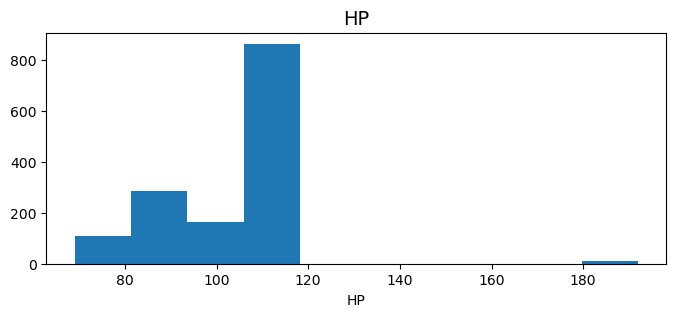

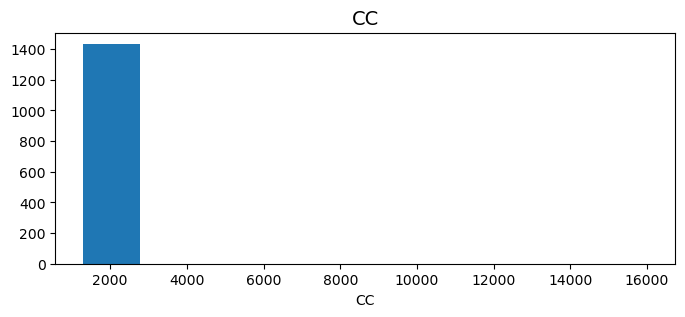

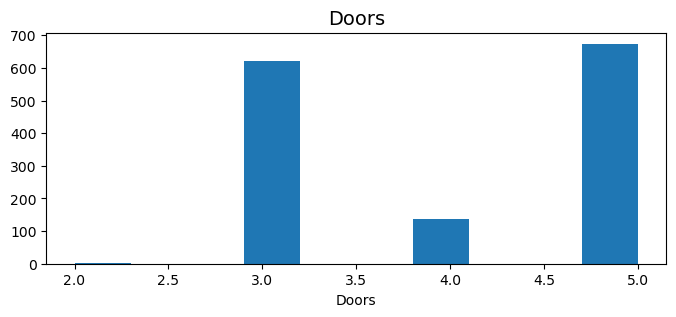

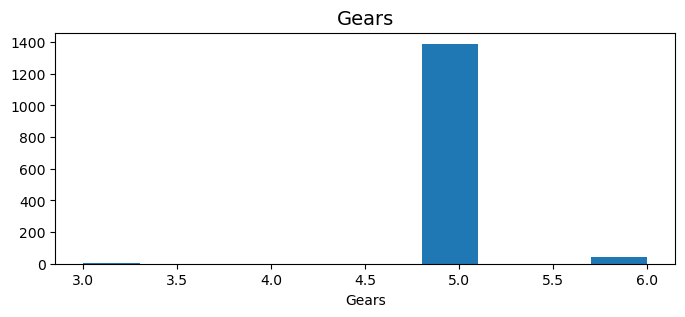

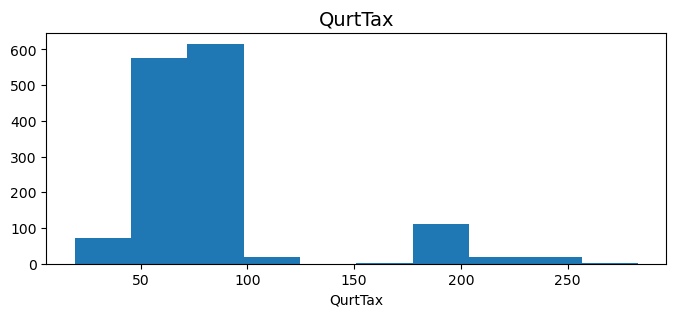

In [36]:
# Plotting features with categorical datatype
import matplotlib.pyplot as plt

# Categorical_features = [feature for feature in toyota.columns if toyota[feature].dtypes == 'object']
Categorical_features = list(toyota.select_dtypes('category').columns)

for feature in Categorical_features:
    plt.figure(figsize = (8,3))
    plt.hist(toyota[feature])
    plt.title(feature, fontsize = 14)
    plt.xlabel(feature)
    plt.show()

***As seen above Age, HP, Gears and Tax have outliers. We will check on these outliers and decide on how to treat them in later steps.***

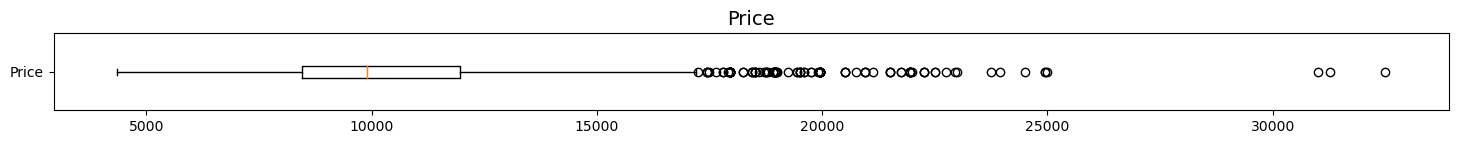

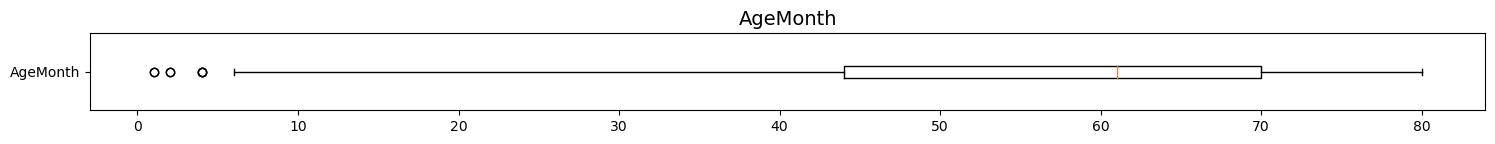

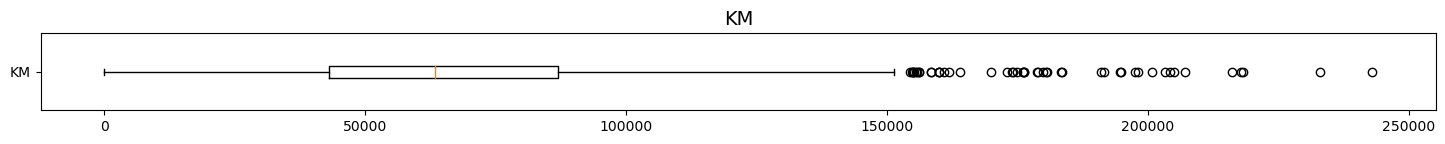

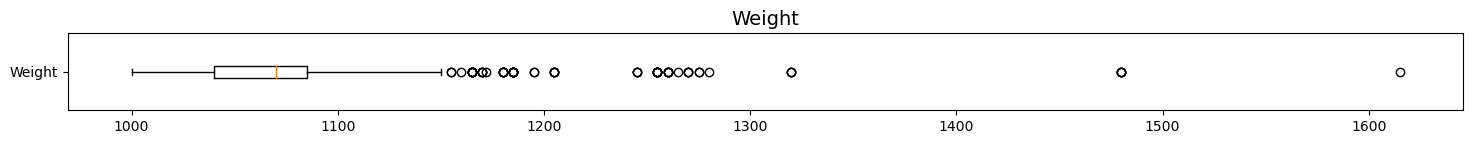

In [35]:
Numerical_features = list(toyota.select_dtypes('int64'))

for feature in Numerical_features:
    plt.figure(figsize = (18,1))
    plt.boxplot(toyota[feature], vert = False)
    plt.yticks([1],[feature])
    plt.title(feature, fontsize = 14)
    plt.show()

***As seen above all the datasets have outliers. let us see how to treat the outliers.***

In [12]:
toyota.corr()

,Price,AgeMonth,KM,Weight
Price,1.000000,-0.876590,-0.569960,0.581198
AgeMonth,-0.876590,1.000000,0.505672,-0.470253
KM,-0.569960,0.505672,1.000000,-0.028598
Weight,0.581198,-0.470253,-0.028598,1.000000


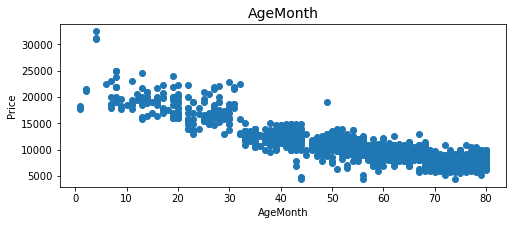

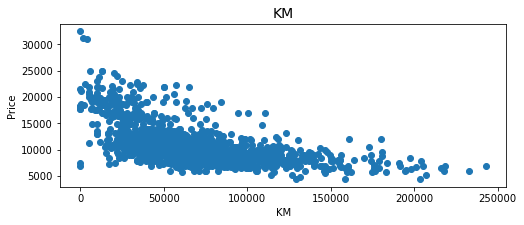

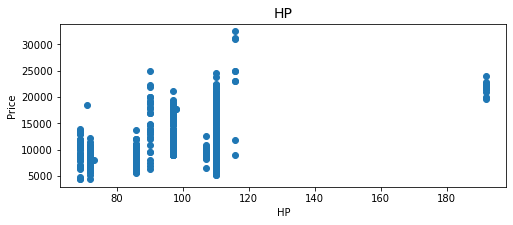

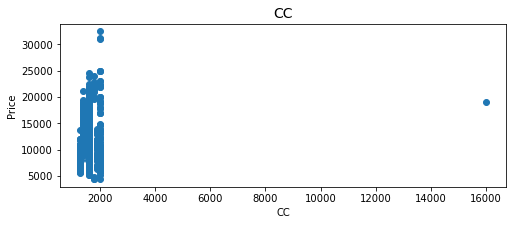

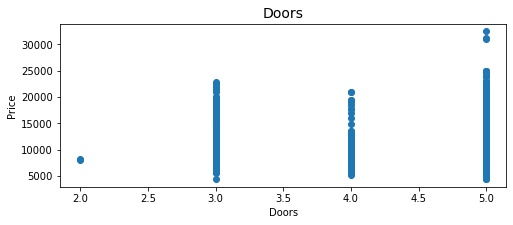

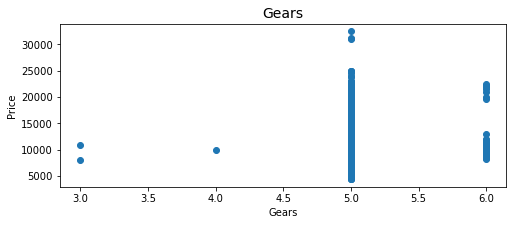

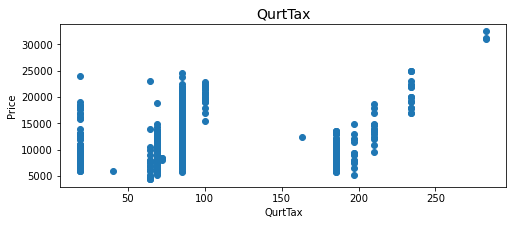

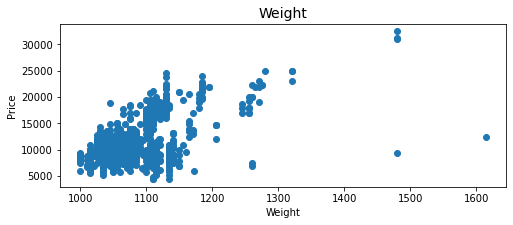

In [46]:
for feature in toyota.columns:
    %matplotlib inline
    if feature == 'Price':
        pass
    else:
        plt.figure(figsize = (8,3))
        plt.scatter(toyota[feature],toyota['Price'])
        plt.title(feature, fontsize = 14)
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.show()

**Only agemonth shows a strong negative correlation with price, while KM shows a reasonable correlation but it is marred with heteroscedasticity. All other features don't show any correlation whatsoever.

### Prilimininary EDA

In [14]:
toyota.groupby(['Gears']).count() ## gear has highest density at 5 gears. This does not actually explain variation in price.
                                    ## it will be on of our last prefered feature for model building. 
                                    # we have rightly converted it into a category

,Price,AgeMonth,KM,HP,CC,Doors,QurtTax,Weight
Gears,,,,,,,,
3,2,2,2,2,2,2,2,2
4,1,1,1,1,1,1,1,1
5,1390,1390,1390,1390,1390,1390,1390,1390
6,43,43,43,43,43,43,43,43


In [15]:
toyota.groupby('Doors').count() # Doors data set is divided in two poles meaning there is two different data groups 
                                # having different influence on the price. but the variation in the doors is simply too 
                                # small to capture and explain the varience in price.

,Price,AgeMonth,KM,HP,CC,Gears,QurtTax,Weight
Doors,,,,,,,,
2,2,2,2,2,2,2,2,2
3,622,622,622,622,622,622,622,622
4,138,138,138,138,138,138,138,138
5,674,674,674,674,674,674,674,674


In [16]:
toyota.groupby('CC').count() # bulk od the data (more than 50%) is associated or representated by one value.

,Price,AgeMonth,KM,HP,Doors,Gears,QurtTax,Weight
CC,,,,,,,,
1300,248,248,248,248,248,248,248,248
1332,2,2,2,2,2,2,2,2
1398,2,2,2,2,2,2,2,2
1400,164,164,164,164,164,164,164,164
1587,4,4,4,4,4,4,4,4
1598,4,4,4,4,4,4,4,4
1600,845,845,845,845,845,845,845,845
1800,14,14,14,14,14,14,14,14
1900,30,30,30,30,30,30,30,30


In [17]:
print(toyota[toyota.CC > 2000])
a = toyota[toyota.CC > 2000].index
toyota.CC[a] = 1600

    Price  AgeMonth     KM   HP     CC Doors Gears QurtTax  Weight
80  18950        25  20019  110  16000     5     5     100    1180


In [18]:
toyota[toyota.CC > 2000]

,Price,AgeMonth,KM,HP,CC,Doors,Gears,QurtTax,Weight


In [19]:
toyota.groupby('HP').count() 
# Again bulk of data is represented by one value. let us hold on with HP for some time.

,Price,AgeMonth,KM,CC,Doors,Gears,QurtTax,Weight
HP,,,,,,,,
69,34,34,34,34,34,34,34,34
71,1,1,1,1,1,1,1,1
72,73,73,73,73,73,73,73,73
73,1,1,1,1,1,1,1,1
86,249,249,249,249,249,249,249,249
90,36,36,36,36,36,36,36,36
97,164,164,164,164,164,164,164,164
98,2,2,2,2,2,2,2,2
107,21,21,21,21,21,21,21,21


In [20]:
# toyota1 = toyota.copy(deep=True)
# toyota1.drop(['Doors','Gears','CC'], axis = 1,inplace=True)
# toyota1.head()

In [22]:
toyota.groupby('QurtTax').count()

,Price,AgeMonth,KM,HP,CC,Doors,Gears,Weight
QurtTax,,,,,,,,
19,72,72,72,72,72,72,72,72
40,1,1,1,1,1,1,1,1
64,18,18,18,18,18,18,18,18
69,559,559,559,559,559,559,559,559
72,3,3,3,3,3,3,3,3
85,613,613,613,613,613,613,613,613
100,19,19,19,19,19,19,19,19
163,1,1,1,1,1,1,1,1
185,96,96,96,96,96,96,96,96


### Treating the outliers
    HP :- HP has one value which is far away from the rest of the value. on search on the internet there seem to be a car with 192 HP. However, on close look at the Density plot we can say that 192 value is dragging the mean to its right. Further there no values in between 120 and 190. Hence, let us impute them with most frequent value, asl linear models are prone to outliers. 
    
    Weight :- Even Weight shows few outliers but most of them are feasible weights of the cars. But weight of the cars also shows that mejority of the cars Weight is below 1200 and very few hevy cars are dragging the mean away from the group. we shall drop them from the dataset for model building as we have large data set for model building.    

#### Price Dataset
    As linear models are prone to outliers we shall drop the outlier of the price dataset too. we can see that data is hightly skewed to the right and hevy tails on both sides

In [23]:
def detect_outliers(data):
    outlier = []
    threshold = 2.9
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z = (i - mean)/std
        if np.abs(z) > threshold:
            outlier.append(i)
    return outlier

age_outliers = detect_outliers(toyota.Price)
print(sorted(age_outliers))


# plt.figure(figsize = (20,3))
# plt.boxplot(toyota1.AgeMonth,vert = False)
# plt.show()

[21500, 21500, 21500, 21750, 21750, 21950, 21950, 21950, 21950, 21950, 21950, 22000, 22250, 22250, 22250, 22500, 22500, 22750, 22950, 23000, 23750, 23950, 24500, 24950, 24950, 24990, 31000, 31275, 32500]


In [25]:
quantile1,quantile3 = np.percentile(toyota.Price, [25,75])
iqr = quantile3 - quantile1
lowerBound = quantile1 - (1.5*iqr)
upperBound = quantile3 + (1.5*iqr)
# print(lowerBound, upperBound)
outlier = []
for i in toyota.Price:
    if i < lowerBound:
        outlier.apend(i)
    elif i > upperBound:
        outlier.append(i)

print(sorted(outlier))

[17250, 17450, 17450, 17450, 17495, 17650, 17795, 17795, 17900, 17950, 17950, 17950, 17950, 17950, 17950, 17950, 17950, 17950, 17950, 17950, 18245, 18245, 18450, 18450, 18450, 18500, 18500, 18500, 18500, 18600, 18700, 18750, 18750, 18750, 18800, 18900, 18900, 18950, 18950, 18950, 18950, 18950, 18950, 18950, 18950, 18950, 18950, 18950, 18990, 19000, 19250, 19450, 19450, 19500, 19500, 19500, 19500, 19600, 19600, 19750, 19750, 19900, 19950, 19950, 19950, 19950, 19950, 19950, 19950, 19950, 19950, 19950, 19950, 20500, 20500, 20500, 20750, 20950, 20950, 20950, 21125, 21500, 21500, 21500, 21750, 21750, 21950, 21950, 21950, 21950, 21950, 21950, 22000, 22250, 22250, 22250, 22500, 22500, 22750, 22950, 23000, 23750, 23950, 24500, 24950, 24950, 24990, 31000, 31275, 32500]


<AxesSubplot:ylabel='Density'>

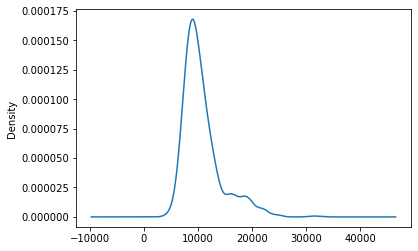

In [26]:
toyota.Price.plot.kde()

In [27]:
toyota1 = toyota.copy(deep = True)

t = toyota1[toyota1['Price']>21500].index
for x in t:
    toyota['Price'][x] = 21500
# temp = toyota.groupby('KM')['Price'].count()/len(toyota)
# temp_df = temp[temp>0.001].index
# temp_df
# t = toyota.groupby('KM')['Price'].mean().sort_values().index
# t = {k:i for i,k in enumerate(t,0)}
toyota1[toyota1.Price>21499]
# log_Price = np.log(toyota.Price)
# log_Price.plot.kde()

,Price,AgeMonth,KM,HP,CC,Doors,Gears,QurtTax,Weight
8,21500,27,19700,192,1800,3,5,100,1185
13,21500,31,23000,192,1800,3,6,100,1185
14,22500,32,34131,192,1800,3,6,100,1185
15,22000,28,18739,192,1800,3,6,100,1185
16,22750,30,34000,192,1800,3,5,100,1185
49,21950,31,64982,192,1800,5,6,100,1195
53,21950,27,49866,192,1800,5,5,100,1195
68,22250,22,30000,110,2000,5,5,234,1275
89,21950,19,50005,110,2000,3,5,234,1265
91,22250,20,37500,90,2000,3,5,234,1260


<AxesSubplot:ylabel='Density'>

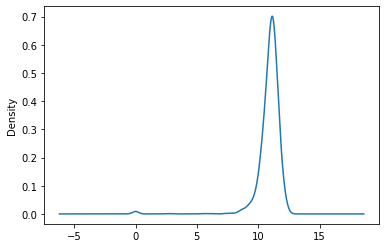

In [28]:
log_km = np.log(toyota.KM)
log_km.plot.kde()

<AxesSubplot:ylabel='Density'>

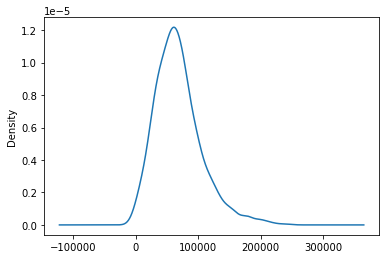

In [29]:
toyota.KM.plot.kde()

In [30]:
toyota1[toyota1.AgeMonth < 7]

,Price,AgeMonth,KM,HP,CC,Doors,Gears,QurtTax,Weight
109,32500,4,1,116,2000,5,5,283,1480
110,31000,4,4000,116,2000,5,5,283,1480
111,31275,4,1500,116,2000,5,5,283,1480
179,22500,6,3000,110,1600,5,5,85,1130
182,21125,2,225,97,1400,5,5,85,1110
183,21500,2,15,110,1600,5,5,85,1130
184,17795,1,1,98,1400,4,5,19,1100
185,18245,1,1,110,1600,5,5,19,1075


In [31]:
drop_index = [109,110,111,179,182,183,184,185]
toyota2 = toyota1.drop(index = drop_index)
toyota2.shape

(1428, 9)

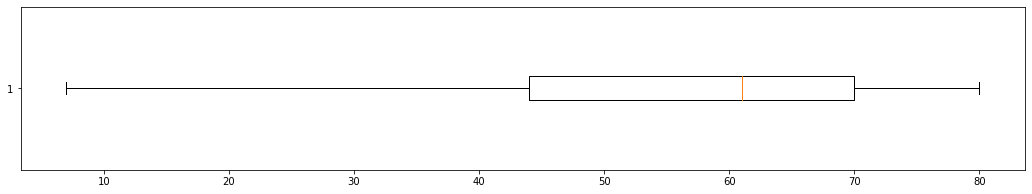

In [32]:
plt.figure(figsize = (18,3))
plt.boxplot(toyota2.AgeMonth,vert=False)
plt.show()

#### KM dataset
    KM dataset has lot of outliers as linear models are prone to outliers and we have a large dataset we can drop the rows against the outliers of KM dataset

In [33]:
outlie_KM = detect_outliers(toyota1.KM)
a = toyota1[toyota1.KM > 179000].index
for x in a:
    toyota1['KM'][x] = np.mean(outlie_KM)
    
toyota1[toyota1.KM > 179000]
# outlie_KMi = detect_outliers(toyota1.KM)
# print(sorted(outlie_KM), len(outlie_KM))
# print(type(outlie_KMi))
# for x in outlie_KMi:
#     toyota1.KM[x] = 179000
# print(toyota[toyota.KM > 178800])
# plt.figure(figsize = (20,3))
# plt.boxplot(toyota1.KM,vert = False)
# plt.show()

,Price,AgeMonth,KM,HP,CC,Doors,Gears,QurtTax,Weight
186,6950,43,199173,69,1900,3,5,185,1110
187,9500,38,199173,90,2000,4,5,210,1160
188,11950,40,199173,90,2000,5,5,210,1205
378,6500,53,199173,69,1900,3,5,185,1110
379,6400,51,199173,69,1900,4,5,185,1095
603,6950,58,199173,72,2000,4,5,185,1100
604,7900,68,199173,72,2000,3,5,185,1115
605,5950,68,199173,86,1300,4,5,69,1000
606,7500,59,199173,72,2000,3,5,185,1115
607,7500,62,199173,72,2000,5,5,185,1140


<AxesSubplot:ylabel='Density'>

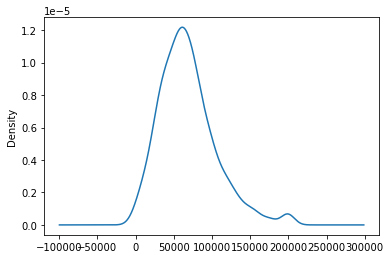

In [34]:
toyota1.KM.plot.kde()

#### Weight Dataset
    there are many outliers in the dataset and tail is dragging the dataset to the right it is a very heavy tail. Considering the correlation with price which is 0.58 shows a modarate correation with Price. let us drop the outliers and keep the feature. in case we need to use it.

In [35]:
Weight_outlie = detect_outliers(toyota1.Weight)
a = toyota1[toyota1.Weight > 1250].index

for x in a:
    toyota1.Weight[a] = np.mean(Weight_outlie)

In [36]:
toyota

,Price,AgeMonth,KM,HP,CC,Doors,Gears,QurtTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


<AxesSubplot:ylabel='Density'>

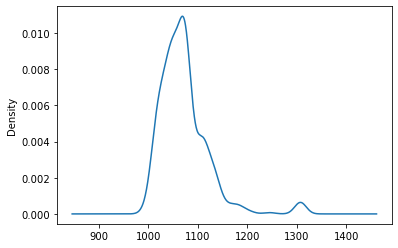

In [37]:
toyota1.Weight.plot.kde()

In [38]:
toyota2 = toyota2[toyota2.Weight < 1250]
toyota2.shape

(1404, 9)

### Final selection of feature
##### There are four assumptions associated with a linear regression model:

**Linearity: The relationship between X and the mean of Y is linear.**

**Homoscedasticity: The variance of residual is the same for any value of X.**

**Independence: Observations are independent of each other.**

**Normality: For any fixed value of X, Y is normally distributed.**

In [39]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [40]:
y_train = toyota.Price
y1_train = toyota1.Price

In [41]:
x_train = toyota.drop(['Price'],axis=1)
x1_train = toyota1.drop(['Price'],axis=1)

In [42]:
feat_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feat_sel_model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [43]:
feat_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [44]:
feat_sel_mod1 = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feat_sel_mod1.fit(x1_train,y1_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [45]:
feat_sel_mod1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [46]:
toyota3 = toyota1.copy(deep=True)
for feature in Numerical_features:
    toyota3[feature] = np.log(toyota[feature])
toyota3.head()

,Price,AgeMonth,KM,HP,CC,Doors,Gears,QurtTax,Weight
0,9.510445,3.135494,10.757605,90,2000,3,5,210,7.060476
1,9.528794,3.135494,11.197351,90,2000,3,5,210,7.060476
2,9.543235,3.178054,10.638520,90,2000,3,5,210,7.060476
3,9.612467,3.258097,10.778956,90,2000,3,5,210,7.060476
4,9.528794,3.401197,10.558414,90,2000,3,5,210,7.064759


Now that all our feature as selected for model building let us go for model building

#### With no outliers let us proceed with model building

In [47]:
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

In [48]:
# toyota.columns
model1 = ols('Price~AgeMonth+KM+HP+CC+Doors+Gears+QurtTax+Weight',data=toyota).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     286.7
Date:                Tue, 18 May 2021   Prob (F-statistic):               0.00
Time:                        16:12:06   Log-Likelihood:                -12128.
No. Observations:                1436   AIC:                         2.434e+04
Df Residuals:                    1394   BIC:                         2.456e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -7011.7509   2197.426     -3.191      0.001   -1.13e+04   -2701.133
HP[T.71]        1684.2392   1472.991      1.143      0.253   -1205.280    4573.758
HP[T.72]        2395.7011   1156.091      2.072      0.038     127.834    4663.568
HP[T.73]        2698.1728   1988.910      1.357      0.175   -1203.407    6599.752
HP[T.86]         974.4461    697.566      1.397      0.163    -393.946    2342.838
HP[T.90]        1260.4295   1252.313      1.006      0.314   -1196.193    3717.052
HP[T.97]         971.4098   1033.355      0.940      0.347   -1055.689    2998.508
HP[T.98]         920.7286   1273.358      0.723      0.470   -1577.176    3418.633
HP[T.107]       3176.6095   1417.522      2.241      0.025     395.903    5957.316
HP[T.110]       3237.3332   1389.792      2.329      0.020     511.024    5963.642
HP[T.116]       1548.0753   1304.786      1.186      0.236   -1011.480    4107.631
HP[T.192]       6642.5914    808.580      8.215      0.000    5056.427    8228.755
CC[T.1332]        -4.7294    812.555     -0.006      0.995   -1598.692    1589.233
CC[T.1398]     -1730.3255   1403.645     -1.233      0.218   -4483.810    1023.159
CC[T.1400]      -912.4482   1148.509     -0.794      0.427   -3165.441    1340.544
CC[T.1587]     -2579.4346   1060.549     -2.432      0.015   -4659.878    -498.991
CC[T.1598]     -1047.2005   1064.001     -0.984      0.325   -3134.417    1040.016
CC[T.1600]     -2611.7864    926.431     -2.819      0.005   -4429.136    -794.437
CC[T.1800]     -3343.6891    899.886     -3.716      0.000   -5108.966   -1578.412
CC[T.1900]       510.0603    715.867      0.713      0.476    -894.233    1914.353
CC[T.1975]      -228.5562   1238.919     -0.184      0.854   -2658.902    2201.790
CC[T.1995]     -1082.3992   1043.718     -1.037      0.300   -3129.826     965.027
CC[T.2000]     -1179.5688    694.653     -1.698      0.090   -2542.246     183.108
Doors[T.3]       -64.3406   1157.535     -0.056      0.956   -2335.039    2206.358
Doors[T.4]       238.0230   1161.079      0.205      0.838   -2039.628    2515.675
Doors[T.5]      -174.9408   1157.239     -0.151      0.880   -2445.058    2095.177
Gears[T.4]      2760.7414   1450.568      1.903      0.057     -84.791    5606.274
Gears[T.5]      1753.7814    891.714      1.967      0.049       4.535    3503.028
Gears[T.6]      2011.4381    906.130      2.220      0.027     233.912    3788.964
QurtTax[T.40]  -2499.8052   1108.692     -2.255      0.024   -4674.689    -324.921
QurtTax[T.64]  -2555.8173    385.831     -6.624      0.000   -3312.689   -1798.945
QurtTax[T.69]    410.3417    161.492      2.541      0.011      93.549     727.134
QurtTax[T.72]   -921.3867    744.803     -1.237      0.216   -2382.443     539.669
QurtTax[T.85]    608.7993    150.440      4.047      0.000     313.686     903.913
QurtTax[T.10

In [49]:
model2 = ols('Price~AgeMonth+KM+HP+CC+Doors+Gears+QurtTax+Weight', data = toyota1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     310.6
Date:                Tue, 18 May 2021   Prob (F-statistic):               0.00
Time:                        16:12:07   Log-Likelihood:                -12144.
No. Observations:                1436   AIC:                         2.437e+04
Df Residuals:                    1394   BIC:                         2.459e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.264e+04   2374.108     -5.324      0.000   -1.73e+04   -7983.525
HP[T.71]         483.3901   1494.199      0.324      0.746   -2447.731    3414.511
HP[T.72]        2451.0214   1168.646      2.097      0.036     158.527    4743.516
HP[T.73]        2634.6945   2010.492      1.310      0.190   -1309.222    6578.611
HP[T.86]          78.4980    710.749      0.110      0.912   -1315.755    1472.751
HP[T.90]         195.7408   1269.528      0.154      0.877   -2294.651    2686.133
HP[T.97]          65.7083   1048.142      0.063      0.950   -1990.397    2121.813
HP[T.98]        -105.8131   1290.528     -0.082      0.935   -2637.400    2425.774
HP[T.107]       2775.6858   1435.758      1.933      0.053     -40.794    5592.165
HP[T.110]       2956.2514   1406.712      2.102      0.036     196.750    5715.753
HP[T.116]       2715.2191   1318.155      2.060      0.040     129.438    5301.000
HP[T.192]       5662.3735    822.876      6.881      0.000    4048.165    7276.582
CC[T.1332]        36.7937    821.369      0.045      0.964   -1574.460    1648.047
CC[T.1398]     -1714.8424   1418.847     -1.209      0.227   -4498.149    1068.464
CC[T.1400]      -996.1983   1160.981     -0.858      0.391   -3273.657    1281.260
CC[T.1587]     -3312.6249   1072.419     -3.089      0.002   -5416.354   -1208.896
CC[T.1598]     -1861.5521   1076.207     -1.730      0.084   -3972.711     249.607
CC[T.1600]     -3371.8776    937.134     -3.598      0.000   -5210.223   -1533.532
CC[T.1800]     -2881.9613    909.187     -3.170      0.002   -4665.484   -1098.439
CC[T.1900]       760.0601    725.397      1.048      0.295    -662.928    2183.048
CC[T.1975]        85.1106   1253.488      0.068      0.946   -2373.816    2544.037
CC[T.1995]     -1547.1409   1058.961     -1.461      0.144   -3624.469     530.188
CC[T.2000]     -1032.5322    706.367     -1.462      0.144   -2418.190     353.126
Doors[T.3]      -197.6202   1170.167     -0.169      0.866   -2493.097    2097.857
Doors[T.4]       151.7015   1173.657      0.129      0.897   -2150.624    2454.027
Doors[T.5]      -361.4931   1170.065     -0.309      0.757   -2656.772    1933.786
Gears[T.4]      2889.0054   1466.319      1.970      0.049      12.576    5765.435
Gears[T.5]      1973.8982    901.794      2.189      0.029     204.878    3742.918
Gears[T.6]      2220.0283    916.504      2.422      0.016     422.153    4017.903
QurtTax[T.40]  -4887.2029   1122.779     -4.353      0.000   -7089.721   -2684.685
QurtTax[T.64]  -4271.3649    399.885    -10.681      0.000   -5055.806   -3486.924
QurtTax[T.69]    512.2094    163.617      3.131      0.002     191.247     833.172
QurtTax[T.72]   -993.2404    752.947     -1.319      0.187   -2470.272     483.791
QurtTax[T.85]    556.6238    151.934      3.664      0.000     258.579     854.668
QurtTax[T.10

In [50]:
model3 = ols('Price~AgeMonth+KM+HP+CC+Doors+Gears+QurtTax+Weight', data = toyota3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     125.3
Date:                Tue, 18 May 2021   Prob (F-statistic):               0.00
Time:                        16:12:08   Log-Likelihood:                 843.89
No. Observations:                1436   AIC:                            -1604.
Df Residuals:                    1394   BIC:                            -1382.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0948      1.469      0.745      0.456      -1.788       3.977
HP[T.71]           0.2460      0.230      1.069      0.285      -0.206       0.698
HP[T.72]           0.0092      0.138      0.067      0.947      -0.261       0.279
HP[T.73]       -2.532e-05      0.237     -0.000      1.000      -0.465       0.465
HP[T.86]           0.2021      0.165      1.225      0.221      -0.122       0.526
HP[T.90]           0.0212      0.149      0.142      0.887      -0.272       0.314
HP[T.97]           0.3410      0.188      1.811      0.070      -0.028       0.710
HP[T.98]          -0.2433      0.207     -1.178      0.239      -0.648       0.162
HP[T.107]          0.1003      0.169      0.593      0.553      -0.231       0.432
HP[T.110]          0.1130      0.166      0.682      0.495      -0.212       0.438
HP[T.116]         -0.0554      0.156     -0.356      0.722      -0.361       0.250
HP[T.192]          0.8712      0.116      7.520      0.000       0.644       1.098
CC[T.1332]         0.0115      0.097      0.119      0.906      -0.179       0.202
CC[T.1398]        -0.1135      0.167     -0.678      0.498      -0.442       0.215
CC[T.1400]        -0.0822      0.137     -0.600      0.549      -0.351       0.187
CC[T.1587]         0.1357      0.184      0.737      0.461      -0.226       0.497
CC[T.1598]         0.2219      0.186      1.192      0.234      -0.143       0.587
CC[T.1600]         0.1143      0.175      0.653      0.514      -0.229       0.458
CC[T.1800]        -0.4646      0.139     -3.348      0.001      -0.737      -0.192
CC[T.1900]         0.1803      0.126      1.431      0.153      -0.067       0.428
CC[T.1975]         0.1421      0.174      0.815      0.415      -0.200       0.484
CC[T.1995]         0.1257      0.158      0.794      0.427      -0.185       0.436
CC[T.2000]         0.0934      0.127      0.735      0.463      -0.156       0.343
Doors[T.3]        -0.0223      0.138     -0.161      0.872      -0.293       0.249
Doors[T.4]        -0.0087      0.139     -0.063      0.950      -0.280       0.263
Doors[T.5]        -0.0204      0.138     -0.148      0.882      -0.291       0.251
Gears[T.4]         0.1198      0.173      0.692      0.489      -0.220       0.459
Gears[T.5]         0.0212      0.106      0.200      0.842      -0.187       0.230
Gears[T.6]         0.0717      0.108      0.664      0.507      -0.140       0.284
QurtTax[T.40]     -0.3658      0.148     -2.476      0.013      -0.656      -0.076
QurtTax[T.64]     -0.1646      0.078     -2.118      0.034      -0.317      -0.012
QurtTax[T.69]      0.0436      0.019      2.248      0.025       0.006       0.082
QurtTax[T.72]     -0.1420      0.089     -1.603      0.109      -0.316       0.032
QurtTax[T.85]      0.0788      0.018      4.370      0.000       0.043       0.114
QurtTax[T.10

## Analysing model 2

### Residual analysis for model 2

#### Test of normality of residuals

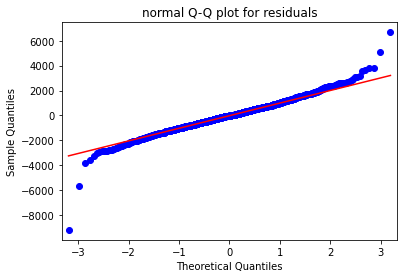

In [51]:
import statsmodels.api as sm
sm.qqplot(model1.resid,line='q')
plt.title('normal Q-Q plot for residuals')
plt.show()

In [52]:
list(np.where(model1.resid < -5000))

[array([601, 960], dtype=int64)]

In [53]:
list(np.where(model1.resid > 5000))

[array([ 523, 1058], dtype=int64)]

#### Residual plot for homoscedasticity

In [54]:
def get_stdiz_val(vals):
    return (vals - vals.mean())/vals.std()

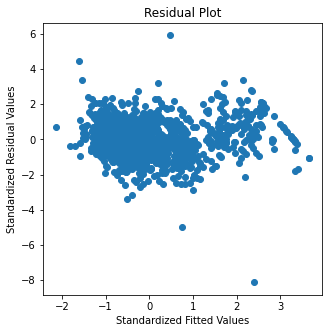

In [55]:
plt.figure(figsize = (5,5))
plt.scatter(get_stdiz_val(model1.fittedvalues), get_stdiz_val(model1.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

***AS WE CAN SEE THE RESUDUALS ARE FOLLOWING ALMOST NORMAL DISTRIBUTION AND THEY ARE DISPERSED AROUND MEAN SYMITRICALLY AND THERE IS NO VISIBLE PATTERN WE CAN SAY THAT OUT MODEL IS NOT BIASED.

#### RESIDUALS VS REGRESSORS

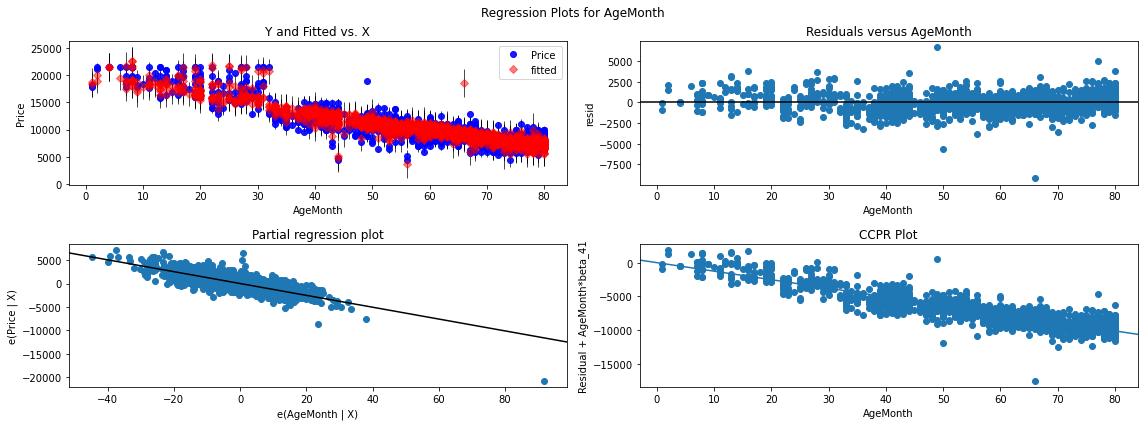

In [56]:
fig = plt.figure(figsize = (16,6))
fig = sm.graphics.plot_regress_exog(model1, 'AgeMonth', fig=fig)

## Model Deletion Diagnostics

#### Identifying and deleting Influencers / outliers

##### Cooks Distance

In [57]:
model1_influence = model1.get_influence()
(c,_) = model1_influence.cooks_distance

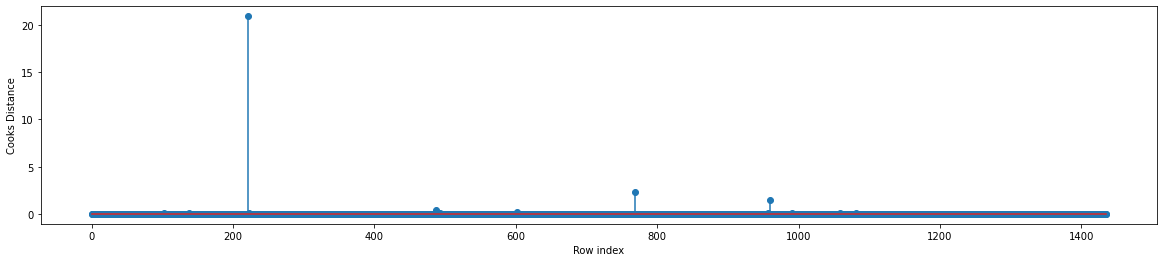

In [58]:
# plotting the influence values
fig = plt.subplots(figsize=(20, 4))
plt.stem(np.arange(len(toyota3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [59]:
(np.argmax(c),np.max(c)) # as the std value is less than 1 we will ignore

(761, nan)

#### High influence points

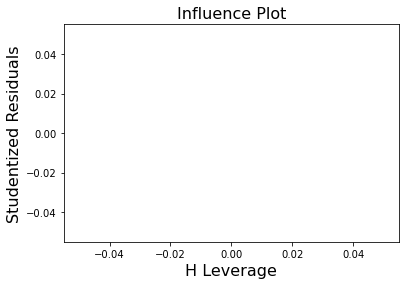

In [71]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

## Analyzing model3

### Residual analysis

#### Test of narmality of residuals

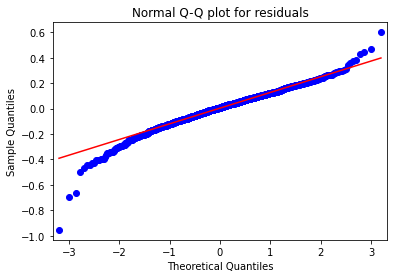

In [64]:
sm.qqplot(model3.resid,line='q')
plt.title('Normal Q-Q plot for residuals')
plt.show()

In [70]:
np.where(model3.resid < -.4)

(array([ 182,  183,  184,  185,  379, 1047, 1048, 1056, 1064, 1093, 1113,
        1351], dtype=int64),)

#### Residual plot for Homoscesticity

In [ ]:
plt.scatter(get_stdiz_val(model4.fittedvalues),get_stdiz_val(model4.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual Values')
plt.show()

### Residual vs Regressor

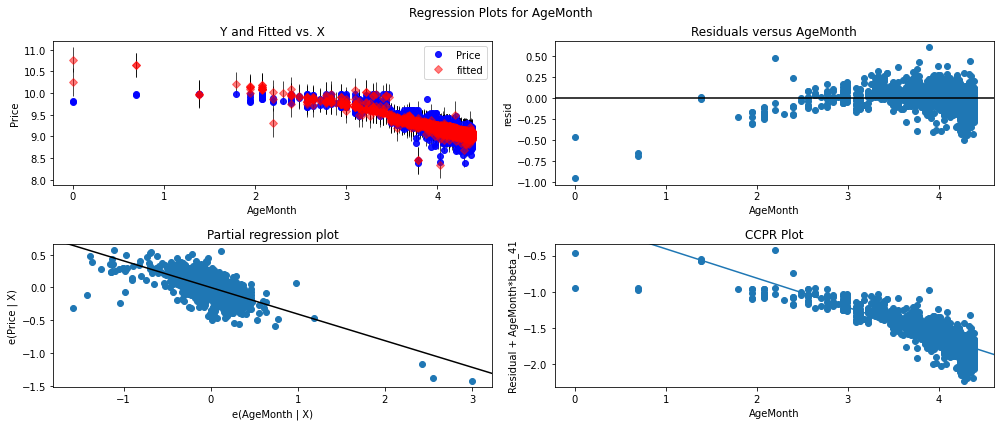

In [72]:
fig = plt.figure(figsize = (14 , 6))
fig = sm.graphics.plot_regress_exog(model3,'AgeMonth',fig=fig)
plt.show()

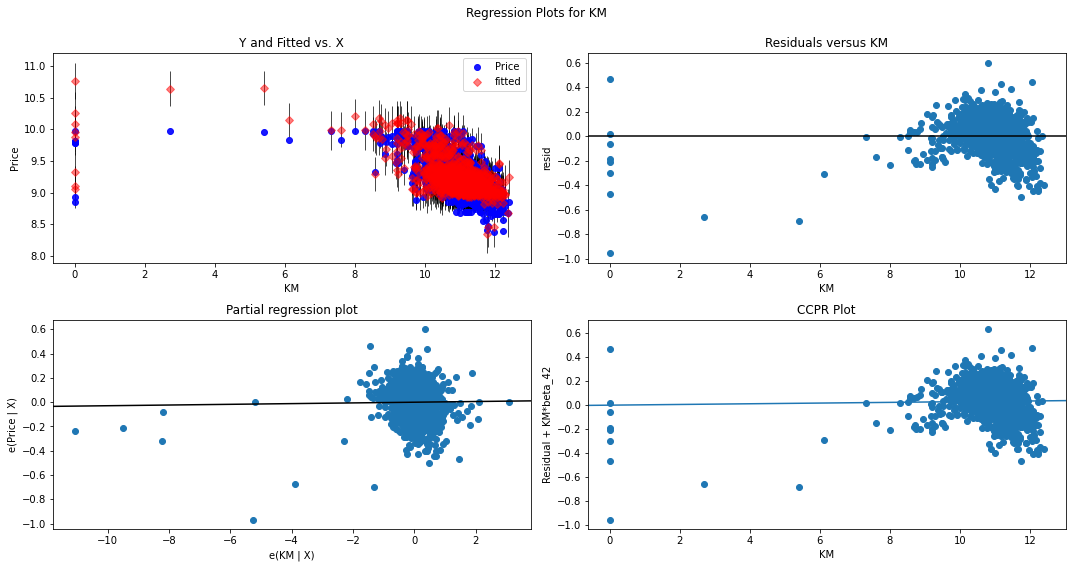

In [73]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model3,'KM',fig=fig)
plt.show()

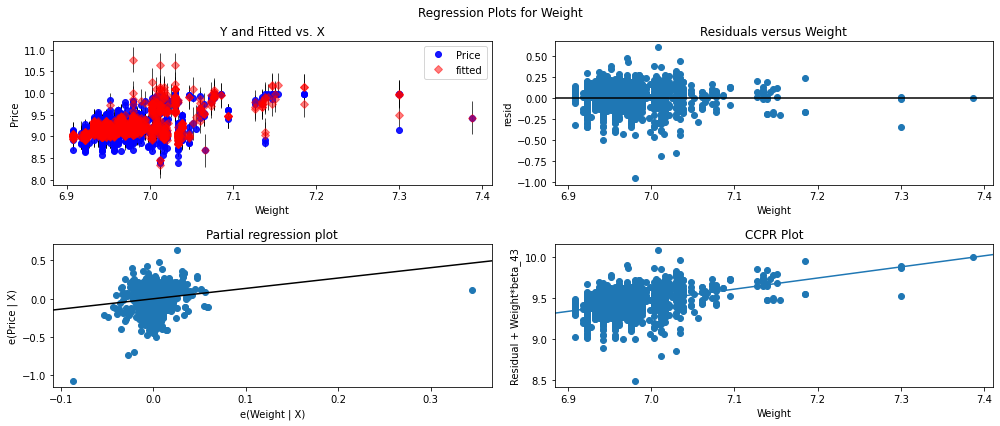

In [74]:
fig = plt.figure(figsize = (14,6))
fig = sm.graphics.plot_regress_exog(model3,'Weight',fig=fig)
plt.show()

## Model Deletion Diagnostics

#### Identifying and deleting Influencers / outliers

##### Cooks Distance

In [ ]:
m4 = model4.get_influence()
(c4,_) = m4.cooks_distance

In [ ]:
plt.subplots(figsize = (20,4))
plt.stem(np.arange(len(toyota2)),np.round(c4,3))
# plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
(np.argmax(c4),np.max(c4))

#### High Influence Points

In [ ]:
influence_plot(model4)
plt.show()

In [ ]:
toyota2 = toyota2.reset_index(drop=True)
toyota2

In [ ]:
toyota3 = toyota3.reset_index(drop=True)

In [ ]:
toyota2[toyota2.index.isin([74])]

In [ ]:
toyota2.iloc[70:80,:] # as we can see the price is an outlier compared to other collums with age and KM. hence drop

In [ ]:
toyota2.drop([74],inplace = True)
toyota.reset_index(drop=True)
toyota2

### Final Model building and testing

#### Final Model 1

In [ ]:
F_model1 = ols('Price~AgeMonth+KM+HP+CC+Doors+Gears+QurtTax+Weight',data=toyota).fit()

(F_model1.rsquared,F_model1.aic)

In [ ]:
pred1 = F_model1.predict(toyota)
resid1 = pred1 - toyota.Price

In [ ]:
rmse1 = np.sqrt(np.mean(resid1*resid1))
rmse1

In [ ]:
pred1 = Final_M1.predict(toyota3)
resid1 = pred1 - toyota3.Price
rmse1 = np.sqrt(np.mean(resid1*resid1))
rmse1

#### Final model 2

In [ ]:
Final_M2 = ols('Price~AgeMonth+KM+HP+Doors+Gears+QurtTax+Weight',data=toyota1).fit()
(Final_M2.rsquared,Final_M2.aic)

In [ ]:
pred2 = Final_M2.predict(toyota1)
resid2 = pred2 - toyota.Price

In [ ]:
rmse2 = np.sqrt(np.mean(resid2*resid2))
rmse2

***As Root mean Square for model1 is less than model 2 we choose model 1***